# Задача по решению СЛАУ
## Вариант о)

## 1. Подготовка к решению задачи

In [14]:
# импорт библиотек
import numpy as np
import matplotlib.pyplot as plt

# CONSTS
N = 100
a = np.float64(10.0)
b = np.float64(1.0/10.0)

Вид системы линейных уравнений  $Ax = b$
где $A$ - матрица системы, $b$ - столбец правой части

In [15]:
# заполнение матрицы А, вектора b

A = np.eye(N, dtype = np.float64)
A = A * a
for i in range(1, N):
    A[i, i - 1] = 1
    if i < N - 1:
        A[i - 1, i] = 1
    if i < N - 1:
        A[i - 1, i + 1] = b

B = np.arange(1, N + 1)

# матрицы, необходимые для к=некоторых расчетов - они упрощают работу с вычислением погрешностей
R = (-1.0) * (A - a * np.eye(N, dtype = np.float64))
Temp = np.linalg.inv(np.tril(A, k = 0)).dot((A - np.tril(A, k = 0)))


In [16]:
# определение эпсилон машинного для типа float64

i = 0
epsFloat = np.float64(1.0)
while (1 + epsFloat) != 1:
        epsFloat  = epsFloat / 2
        i += 1
print("Машинное эпсилон :", epsFloat)

# матрица абсолютных погрешностей А
deltaA = epsFloat * A

# столбец абсолютных погрешностей b
deltaB = epsFloat * B

epsB = np.linalg.norm(deltaB, ord = 2) / np.linalg.norm(B, ord = 2)
epsA = np.linalg.norm(deltaA, ord = 2) / np.linalg.norm(A, ord = 2)

print("epsilon A:", epsA, "\nepsilon B:", epsB)


Машинное эпсилон : 1.1102230246251565e-16
epsilon A: 1.1102230246251565e-16 
epsilon B: 1.1102230246251565e-16


### 2. Алгоритм Гаусса 

In [17]:
# программирование метода Гаусса
def HaussSolve(A, B = None):
    n = len(B)
    C = A.copy()

    # делаем расширенную матрицу системы
    if B is not None:
        C = np.c_[C, B]

    # прямой ход алгоритма Гаусса
    for nstr in range(n):
        # смена строк, чтобы на текущем месте была строка с максимальным диагональным элементом
        value = nstr + np.argmax(abs(C[nstr:, nstr]))
        if value != nstr:
	        C[nstr], C[value] = C[value], np.copy(C[nstr])
        # производим прямой ход алгоритма Гаусса построчно
        C[nstr, nstr:] /= C[nstr, nstr]
        for cstr in C[(nstr + 1):]:
            cstr -= C[nstr] * cstr[nstr]
        
        
    # Обратный ход алгоритма Гаусса
    for nstr in range(n - 1, 0, -1):
        for cstr in C[:(nstr)]:
            cstr -= C[nstr] * cstr[nstr]

    return C[:, -1]



## 3. Расчет вычислительной погрешности для исходной системы и для систем с выбранной правой частью

+ По основной теореме оценим вычислительную погрешность полученного точного решения, принимая $\| \delta f\| = \| \delta A\| = \epsilon_{маш}$

$AU = f$

$\| \delta U\| = \frac{\mu}{1 - \mu \| \delta A \|}(\| \delta A \| + \| \delta f\|)$

In [18]:
# нормы матриц
norm1 = np.linalg.norm(A, ord = 1)
norm2 = np.linalg.norm(A, ord = np.inf)
norm3 = np.linalg.norm(A, ord = 2)

print("Нормы матриц:", norm1, norm2, norm3)

# точное решение
U = HaussSolve(A, B)
normU = np.linalg.norm(U, ord = 2)

# число обусловленности 
Mu1 = norm1 * np.linalg.norm(np.linalg.inv(A), ord = 1)
Mu2 = norm2 * np.linalg.norm(np.linalg.inv(A), ord = np.inf)
Mu3 = norm3 * np.linalg.norm(np.linalg.inv(A), ord = 2)
print("Число обусловленности матрицы А:", "\nпо норме 1 - " , Mu1, "\nпо норме 2 - ", Mu2, "\nпо норме 3 - " , Mu3)

# вычисление абсолютной погрешности решения
NormDeltaU = Mu3 / (1 - Mu3 * epsA ) * ( epsB + epsA )
print("Оценка относительной вычислительной погрешности (по норме 3) полученного точного решения:", NormDeltaU)

# вычисление абсолютной погрешности решения, учитывая, что delta A примерно 0
NormDeltaU = Mu3 * epsB
print("Оценка относительной вычислительной погрешности (по норме 3) полученного точного решения в пренебрежении погрешностью delta А:", NormDeltaU)

Нормы матриц: 12.1 12.1 12.098823914668102
Число обусловленности матрицы А: 
по норме 1 -  1.4970992831504324 
по норме 2 -  1.5064472594732172 
по норме 3 -  1.4935358394602174
Оценка относительной вычислительной погрешности (по норме 3) полученного точного решения: 3.31631575414319e-16
Оценка относительной вычислительной погрешности (по норме 3) полученного точного решения в пренебрежении погрешностью delta А: 1.6581578770715948e-16


+ Найдем вектора $F_{max}$ и $F_{min}$ на которых достигается максимальная и минимальная вычислительная погрешность решения (вывод соотношения приведен в отчете, пункт 1.5)

In [19]:
# найдем значения правой части, которые отвечают максимальной и минимальной вычислительной погрешностям 

# собственные числа матрицы А, A^(-1)
L, v = np.linalg.eigh(A.dot(A.T))
Li, vi = np.linalg.eigh(np.linalg.inv(A).dot(np.linalg.inv(A).T))

# на F достигается (в теориии) максимальная погрешность вычисления решения
Fmax= A.dot(v[np.argmax(L)])

# на F достигается (в теории) минимальная погрешность вычисления решения 
Fmin = vi[np.argmax(Li)]

In [20]:
# в качестве eps(f) {Ax = f} выбрано epsFloat 

# проверка соответствия априорной погрешности (максимальной и минимальной) и реальной  погрешности вычислений
# Fmax 
Umax = HaussSolve(A, Fmax)
epsilon = np.linalg.norm(Umax - v[np.argmax(L)], ord = 2) / np.linalg.norm(Umax, ord = 2)
print("реальная вычислительная погрешность: ", epsilon, " теоретическая вычислительная погрешность: ", Mu3*epsFloat)

# Fmin
Umin = HaussSolve(A, Fmin)
epsilon = np.linalg.norm(Umin - np.linalg.solve(A, Fmin), ord = 2) / np.linalg.norm(Umin, ord = 2)
print("реальная вычислительная погрешность: ", epsilon, " теоретическая вычислительная погрешность: ", epsFloat/Mu3)

реальная вычислительная погрешность:  1.2833015559581555e-16  теоретическая вычислительная погрешность:  1.6581578770715948e-16
реальная вычислительная погрешность:  1.0995791511731737e-16  теоретическая вычислительная погрешность:  7.43352114688058e-17


+ Так как на самом деле при вычислении на машине мы не можем произвольно выбирать $\| \Delta f \|$ (если ошибка заключается в $ \epsilon_{маш}$ то вектора $\Delta f$ и $f$ коллинеарны).

Поэтому нам нужно уточнить оценку границ получаемой вычислительной погрешности решения (оценка приведена в отчете, пункт 1.6)

In [21]:
# проверка соответствия априорной погрешности (максимальной и минимальной) и реальной  погрешности вычислений
# при учете пункта 1.6 письменного отчета

# Fmin
Umin = HaussSolve(A, Fmin)
epsilon = np.linalg.norm(Umin - np.linalg.solve(A, Fmin), ord = 2) / np.linalg.norm(Umin, ord = 2)

print("реальная вычислительная погрешность: ", epsilon, " теоретическая вычислительная погрешность: ", epsFloat)

реальная вычислительная погрешность:  1.0995791511731737e-16  теоретическая вычислительная погрешность:  1.1102230246251565e-16


+ Подбор тестового решения

Попытаемся выбрать точное (целочисленное решение системы) таким образом, чтобы достигаемая на нем вычислительная погрешность становилась как можно большей. Оценка приведена в отчете, пункт 1.7 

In [22]:
Utest = np.round(v[np.argmax(L)] , decimals = 4)
Ftest = A.dot(Utest)
UtestSolve = HaussSolve(A, Ftest)
epsilon = np.linalg.norm(UtestSolve - Utest, ord = 2) /  np.linalg.norm(Utest, ord = 2)
print ("Вычислительная погрешность тестового решения (по норме 1)", epsilon)



Вычислительная погрешность тестового решения (по норме 1) 1.7704230317376498e-16


Данная погрешность превышает полученную ранее погрешность для $F_{max}$. Скорее всего это возникает из-за промежуточных дополнительных вычислений (умножение матрицы на столбец тестового решения вносит дополнительную ошибку). 

То есть мы можем пользоваться данным тестовым решением как хорошим проверочным, т.к. оно дает большую (достаточно) вычислительную погрешность.

## 4. Построение функций для вычисления последовательных приближений и различного рода критериев останова

In [23]:

# функция вычисления последовательного приближения
# fx = Rx + B
def CalculateApprox (a, R, B, f):
    curr = np.zeros(len(a), dtype = np.float64)
    curr = a.copy()
    for i in range(len(curr)):
        if R[i,i] != 0:
            print ("Error in R matrix!\n")
            return a
        tmp = R.dot(curr)
        curr[i] = (B[i] + tmp[i]) / f[i]
    return curr

# функция вычисления k -го последовательного приближения
def CalculateApproxK (a, R, B, f, k):
    b = a.copy()
    for i in range(k):
        b = CalculateApprox(b, R, B, f)
    return b 

# вычисление невязки по норме k
# r = f - Ax
def CalculateDiscrep (x, A, B, k):
    r = np.zeros(len(x), dtype = np.float64)
    r = B - A.dot(x)
    norm = np.linalg.norm(r, ord = k)
    return norm

# вычисление нормы (K) погрешности n-го приближения относительно точного решения
def CalculateErrorSolut (B, eps0, n, k):
    normB = np.linalg.norm(B, ord = k)
    normEps = np.linalg.norm(eps0, ord = k)
    norm = np.float64((normB ** n) / (1 - normB) * normEps )
    return np.abs(norm)

#вычисление нормы (K) погрешности n-го приближения относительно n-1 приближения
def CalculateErrorSubs (Xn, Xn1, k):
    Xn1 = Xn1 - Xn
    return np.linalg.norm(Xn1, ord = k)



In [24]:
# вычисление приближенного решения с разными критериями останова

x = np.zeros(len(B), dtype = np.float64)
f = np.full((len(B), 1), a, dtype = np.float64)

# по невязке, норма 3
# приближение (условие выхода из цикла) выбрано именно так, потому что разница по невязке достигает определенного значения, 
# сравнимого с epsFloat, но немного его превышающего и далее не становится меньше.
counter = 0
epsilon = 1
epsilon_new = 1
while ( epsilon_new != epsilon or counter == 0):
     epsilon = epsilon_new
     x = CalculateApprox (x, R, B, f)
     epsilon_new = (CalculateDiscrep(x, A, B, 2) / np.linalg.norm(x, ord = 2))
     counter += 1

print ("Разница между приближенным и точным решением (по норме 3): ")
print ( "по невязке:", np.linalg.norm(x - U, ord = 2), "достигнута за ", counter, " итераций")

# по относительной погрешности, норма 3
x = np.zeros(len(B), dtype = np.float64)
counter = 0
eps0 = np.zeros(len(B), dtype = np.float64)
epsilon = 1
while ( epsilon >= epsFloat or counter == 0):
     if (counter == 0):
          eps0 = CalculateApprox (x, R, B, f) - x
     x = CalculateApprox (x, R, B, f)
     counter += 1
     epsilon = CalculateErrorSolut(Temp, eps0, counter, 2) / np.linalg.norm(x, ord = 2)

print("по разнице относительно точного решения:", np.linalg.norm(x - U, ord = 2), "достигнута за ", counter, " итераций")

# по погрешности соседних приближений, норма 3
x = np.zeros(len(B), dtype = np.float64)
counter = 0
epsilon = 1
while ( epsilon >= epsFloat or counter == 0):
     if np.linalg.norm(x, ord = 2) > 0 :
          epsilon = CalculateErrorSubs(CalculateApprox(x, R, B, f), x, 2) / np.linalg.norm(x, ord = 2)
     x = CalculateApprox (x, R, B, f)
     counter += 1
     
print("по разнице соседних приближений:", np.linalg.norm(x - U, ord = 2), "достигнута за ", counter, " итераций")

Разница между приближенным и точным решением (по норме 3): 
по невязке: 6.145212311185426e-15 достигнута за  19  итераций
по разнице относительно точного решения: 6.521260943100148e-15 достигнута за  17  итераций
по разнице соседних приближений: 6.144961583414001e-15 достигнута за  18  итераций


+ кусок про плохо обусловленную матрицу 

## 5. Построение графиков для сравнения скорости убывания ошибок

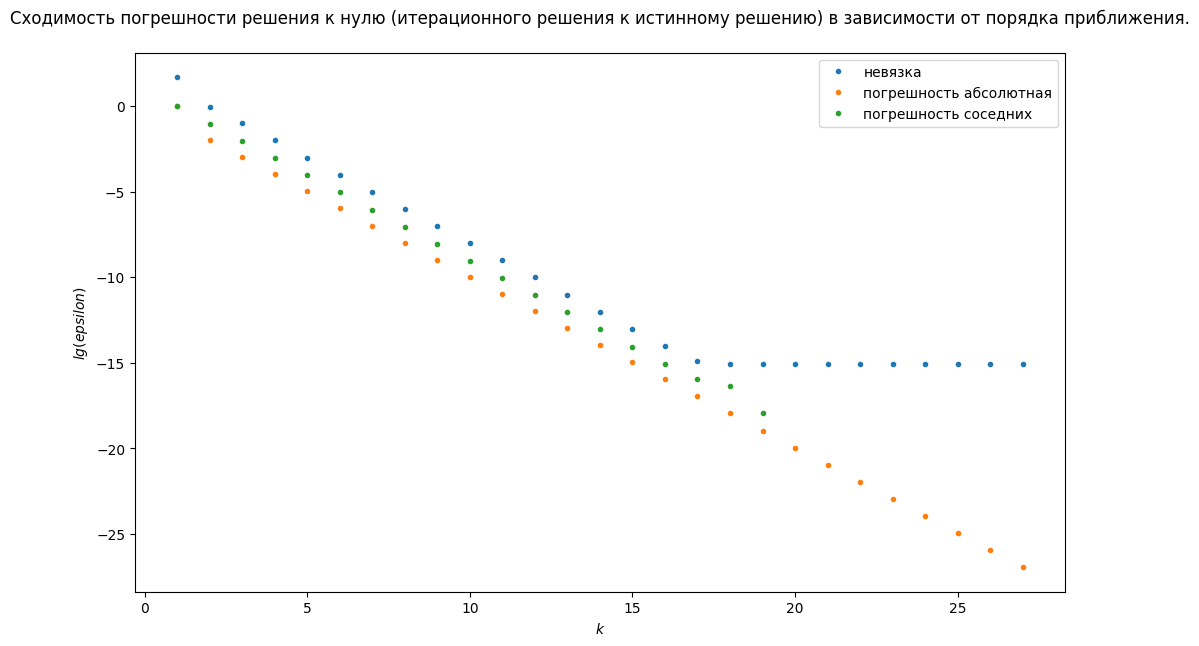

In [25]:
# построение графиков для анализа скорости убывания относительной погрешности

k = np.arange(1, 28)
x = np.zeros(N, dtype = np.float64) + 1

E1 = np.zeros(len(k))
E2 = np.zeros(len(k))
E3 = np.zeros(len(k))

for i in range(len(k)):
    E1[i] = np.log10(CalculateDiscrep(x, A, B, 2) / np.linalg.norm(x, ord = 2))
    x1 = CalculateApprox(x, R, B, f)
    if i == 0:
        eps0 = x1 - x
    if (i > 0):
        E2[i] = np.log10(CalculateErrorSolut(Temp, eps0, k[i], 2)/ np.linalg.norm(x1, ord = 2))
        if (x1 != x).any():
            E3[i] = np.log10(CalculateErrorSubs(x1, x, 2)/ np.linalg.norm(x1, ord = 2))
        else:
            E3[i] = (-1)*np.inf
    x = x1

# построение графиков 

plt.figure(figsize=[12,7])
plt.plot(k, E1, '.', label = "невязка")
plt.plot(k, E2, '.', label = "погрешность абсолютная")
plt.plot(k, E3, '.', label = "погрешность соседних")

plt.xlabel("$k$")
plt.ylabel("$lg(epsilon)$")
plt.title("Сходимость погрешности решения к нулю (итерационного решения к истинному решению) в зависимости от порядка приближения.\n")

plt.legend()
plt.show()

### Анализ графиков

* *Невязка* 

    Мы видим, что до некоторых пор график линейно убывает -- это отображает характер скорости уменьшения погрешности -- как геометрическая прогрессия. Затем относительная погрешность невязки по отношению к решению перестает уменьшаться. Как можно заметить, это происходит при достижении величин погрешности порядка $ \epsilon _{маш} $. 

* *Погрешность относительно точного решения*

    Данная погрешность монотонно убывает (в логарифмическом масштабе) - это объясняется тем, что данная погрешность вычисляется по формуле, не учитывающей разницу между последовательными приближениями, а основывается только на номере приближения и разности первого и нулевого приближений.

* *Погрешность соседних решений*

    Данный график построен только до значений $k = 18$ так как в данном случае вычисляется погрешность по разности двух последовательных приближений. И по достижении $ \epsilon _{маш} $ данная ошибка обращается в 0 - логарифм обращается в $ - \infty$.

In [26]:
A = np.array([[0, -6, 0], [0, 6, 21], [0, 7/3, 49/6]])
A[:, :] /= 18

print (A)
L, v = np.linalg.eigh(A)
print(L)

print(np.linalg.norm(A, ord = 2))

[[ 0.         -0.33333333  0.        ]
 [ 0.          0.33333333  1.16666667]
 [ 0.          0.12962963  0.4537037 ]]
[0.         0.25059862 0.53643842]
1.3052957100503522
